# Heart Disease Dataset


In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# import data into dataframe
df = pd.read_csv("heart.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


## Data Cleaning

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Most of the columns have names that don't make intuitive sense to me as I am not familiar which the cardiovascular system and heart diseases. As a result of this, I will be renaming the columns to names that make more sense to me.

In [5]:
columns = {"cp": "chest_pain_type", "trestbps": "rest_bp", "chol": "cholesterol", "fbs": "fasting_blood_sugar", "restecg": "rest_ecg", "thalach": "max_heart_rate", "exang": "exercise_angina", "oldpeak": "exercise_st_depression","slope": "exercise_st_slope", "ca": "n_vessels_fluoro"}
df = df.rename(columns, axis=1)
df.columns

Index(['age', 'sex', 'chest_pain_type', 'rest_bp', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 'exercise_angina',
       'exercise_st_depression', 'exercise_st_slope', 'n_vessels_fluoro',
       'thal', 'target'],
      dtype='object')

In [6]:
# check missing values
df.isnull().sum()

age                       0
sex                       0
chest_pain_type           0
rest_bp                   0
cholesterol               0
fasting_blood_sugar       0
rest_ecg                  0
max_heart_rate            0
exercise_angina           0
exercise_st_depression    0
exercise_st_slope         0
n_vessels_fluoro          0
thal                      0
target                    0
dtype: int64

In [7]:
# check datatypes
df.dtypes

age                         int64
sex                         int64
chest_pain_type             int64
rest_bp                     int64
cholesterol                 int64
fasting_blood_sugar         int64
rest_ecg                    int64
max_heart_rate              int64
exercise_angina             int64
exercise_st_depression    float64
exercise_st_slope           int64
n_vessels_fluoro            int64
thal                        int64
target                      int64
dtype: object

It seems that there are no missing values and all values are the correct datatype.

In [8]:
# check for duplicated values
df.duplicated().value_counts()

False    302
True       1
dtype: int64

In [9]:
# There seems to be duplicate entries so I'll find which rows are duplicated
df[df.duplicated(keep=False)]

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,exercise_st_depression,exercise_st_slope,n_vessels_fluoro,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


So it seems that there are two duplicated rows (163 and 164). I think it is highly unlikely that there would be two patients that have all 14 values that are the same.

In [10]:
# removed duplicates
df = df.drop_duplicates()
df[df.duplicated(keep=False)]

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,exercise_st_depression,exercise_st_slope,n_vessels_fluoro,thal,target


For now, I don't think there are any problems with the data.
## Data Exploration

In [11]:
df["target"].value_counts()

1    164
0    138
Name: target, dtype: int64

In [12]:
df.describe()

,age,sex,chest_pain_type,rest_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,exercise_st_depression,exercise_st_slope,n_vessels_fluoro,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


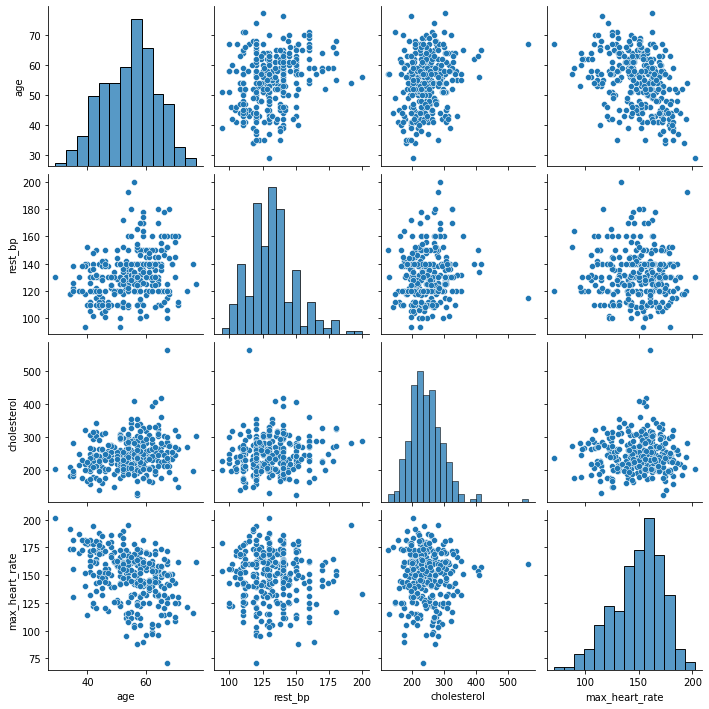

In [13]:
sns.pairplot(df[["age", "rest_bp", "cholesterol", "max_heart_rate"]])

Looking at the scatterplots, it seems as though there are no obvious correlations between the different variables except for "max_heart_rate" and "age" which has a weak negative linear correlation. Also, looking at the histograms we see that they are all unimodal.